# Métodos no supervisados.
Esto quiere decir que no hay etiquetas. Es decir, se tienen datos de entrada y no mas. No hay lo que esta adentro ni lo que sale. Entonces esto para que sirve? Vamos a ver algunos ejemplos donde esto tiene utilidad. Como no hay etiquetas los metodos son mas imprecisos, pero no necesariamente inutiles.

Los metodos que vamos a estudiar hoy son
*  Cluster analysis (agrupamiento)
* PCA: Principal component analysis (analisis de componentes principales)
* Deteccion de anomalias (anomaly detection).

## Clustering (agrupamiento).
Comenzamos con el ejemplo de averiguar el precio de una casa. En este caso, tenemos areas pero no tenemos precios. No podemos usar regresion lineal.
Vamos a agrupar. Los datos de las casas estan en la Figura 4.3



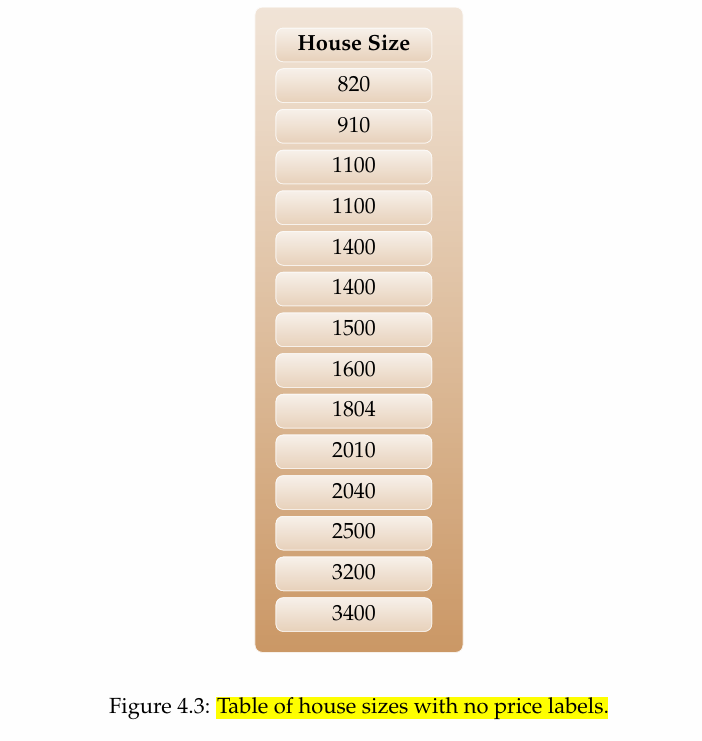

Vamos a visualizar estas areas con puntos sobre a linea horizontal. Figura 4.4

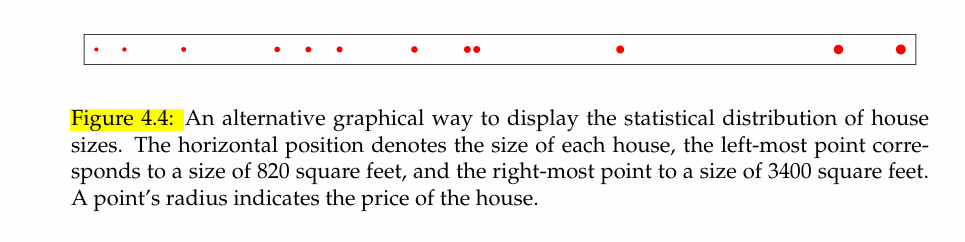

Hay distintas t'ecnicas de agrupacion

* Cuando objetos no son compartidos por distintos grupos. Los grupos son disjuntos. Exclusive clustering (esta clase)
* Cuando los objetos pueden ser compartidos por distintos grupos. **Non exclusive clustering** . (no lo vemos aca)
* Fuzzy clustering. Usa probabilidades para agrupar. Tampoco lo vemos aca.

Dentro de los metodos exclusivos esta el

## k-means clustering (media con $k$ grupos).
La idea es agrupar elementos de los distintos grupos al rededor de su centroide.

Veamos el algoritmo:
1. Decidimos el numero de grupos ($k$).
2. Decidimos por $k$ centros aleatorios y distintos.
$\mu_j$, $j=1,2, \cdots, k$.
3. Se inicializa un vector $c$ de $m$ elementos. Cada componente $c_i$ de este vector es un centro hipotetico.
4. Decidimos por $k=3$. Hacemos una busqueda de puntos cercanos a este centro y se los asignamos a este centro. Por ejemplo asuma ue $c=[1,1,2,3,1,3,2,2]$. Esto quiere decir que $[x_1, x_2, x_5]$ pertenecen al centro $c_1$, los puntos $[x_3, x_7, x_8]$ pertenecen al centro $c_2$, y los puntos $x_4, x_6$ pertenecen al centro $c_3$.
Asociacion por cercania.

5. Encontramos nuevos centros $\mu_i$. Veamos
\begin{eqnarray}
\mu_1 &=& \frac{x_1 + x_2 + x_5}{3} \\
\mu_2 &=& \frac{x_1 + x_2 + x_8}{3} \\
\mu_3 &=& \frac{x_4  + x_6}{2}.
\end{eqnarray}

6. Se repite el proceso desde el paso 4 en ciclos. Hasta donde? Debe haber un  umbral.

podemos pensar en un funcion de costo que estime el error. Esta funcion de costo es la dispersion de los puntos con respecto a sus centros.

$$J(x, c, u) = \sum_{i=1}^m \| x_i - \mu_{c_i} \|^2 $$
Si $k=m$, $J(x,c,u)=0$ (pruebelo). Entonces $k<m$.


Con un ejemplo grafico explico el metodo. Observe la Figura 4.5


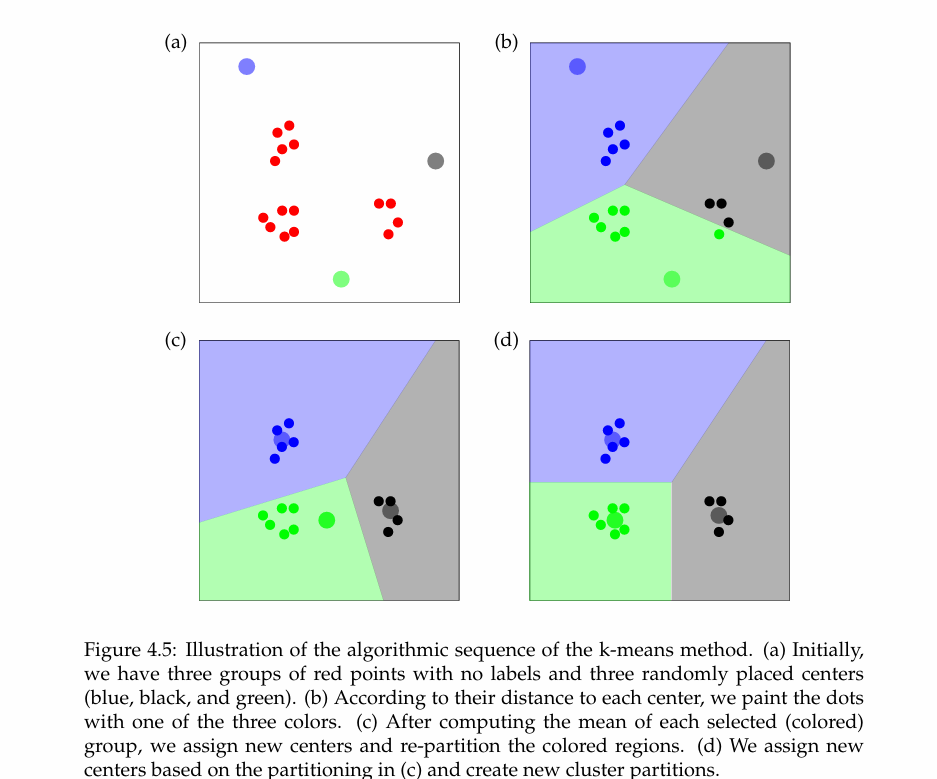

El algoritmo se muestra enseguida.

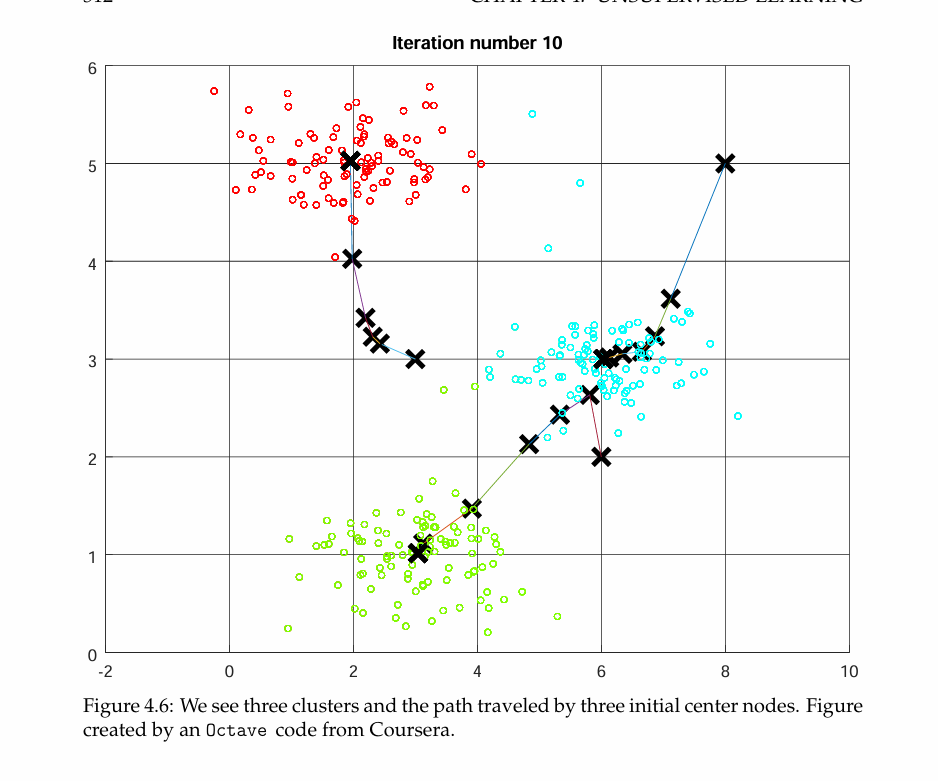

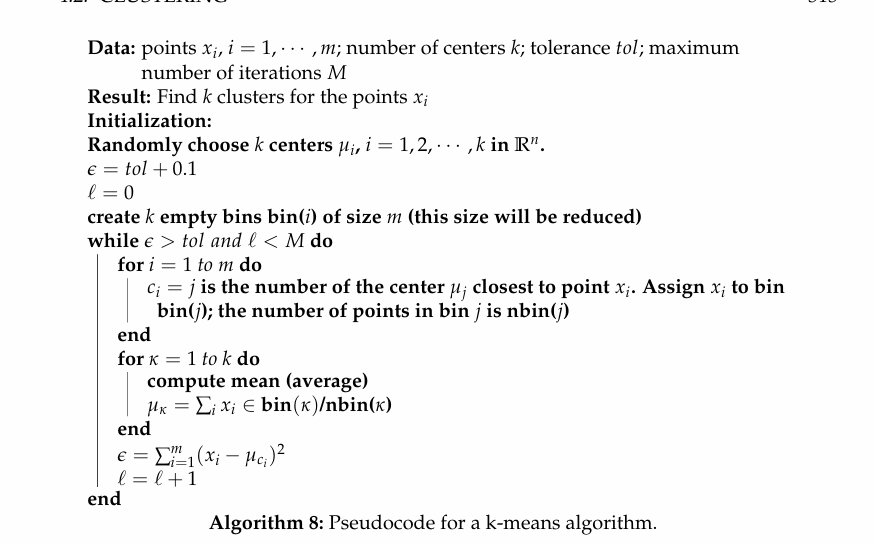


## Como escoger $k$?
Hay varios metodos.
* Directos: elbow (codo) y otros que se llama Silhouette (silueta)
* Estadisticos. usan probabilidades. El lenguale `R` tiene mas de 20 m'etodos para estimar el valor de $k$. `Python` y `Matlab` tambien tiene muchos metodos.

### El metodo del codo consiste en encontrar en punto donde la curva de costo se aplane como funcion $k$. Punto de curvatura maxima.  La Figura 4 muestra un ejemplo.

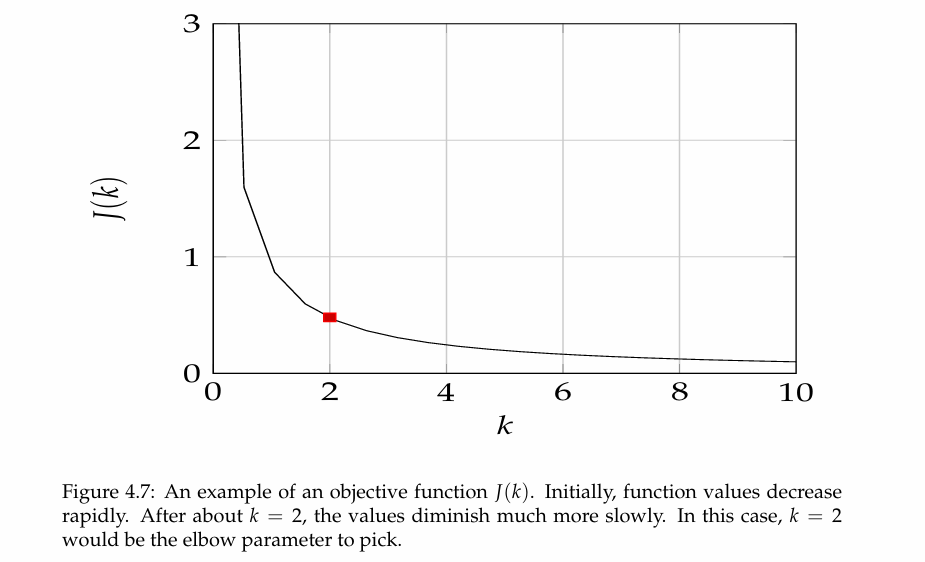

## Medodo del promedio de la silueta.
Hay dos condiciones interesantes para los puntos.

* Puntos en el mismo grupo esten tan pegados como sea posible **cohesion**.
* Puntos en grupos distintos esten tan alejados como sea posible **separacion**.

La matematica es la siguiente.
$$C_I = \{ x_{I1}, x_{I2}, \cdots, x_{I k_I} \} $$
$I=1,2 , \cdots n$.
Este es el cluster $I$ de $n$ clusters (grupos).

La cohesion de elemento $x_{Ii}$  esta dada por

$$a_{Ii} = \frac{1}{ | C_I | - 1} \sum_{j=1}^{k_I} d(x_{Ij}, x_{Ii}) $$
Entre mas pequeno este numero, mas a la cohesion entre los datos (mas pegados).

La **separacion** es la distancia media a puntos de otros grupos.

$$\frac{1}{C_j} \sum_{j=1}^{k_J} d(x_{Ii}, x_{Jj}) $$
en este caso la separaci'on.

Relamente para estimar que tan separados esten los clusters debemos tomar el minimo sobre esta suma

$$b_{Ii} = \min_{J \ne I} \frac{1}{k_J} \sum_{j=1}^{k_j} d(x_{Ii}, x_{Jj}) $$

Definimos la silueta con la siguiente formula

$$
S_{Ii} =
\begin{cases}
\frac{b_{Ii}- a_{Ii}}{\max \{ a_{Ii}, b_{Ii} \}} \quad , \quad |C_I| > 1 \\
0 \quad , \quad |C_I| = 1
\end{cases}
$$

La silueta esta entre -1 y 1.
Se puede ver como una funcion

\begin{eqnarray}
S : A &\to& \mathbb{R} \\
x_{Ii} &\mapsto&  S_{Ii}.
\end{eqnarray}


La pagina [Analisis de silueta](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

muestra un ejemplo de la implementacion del algoritmo.



For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.561464362648773
For n_clusters = 6 The average silhouette_score is : 0.4857596147013469


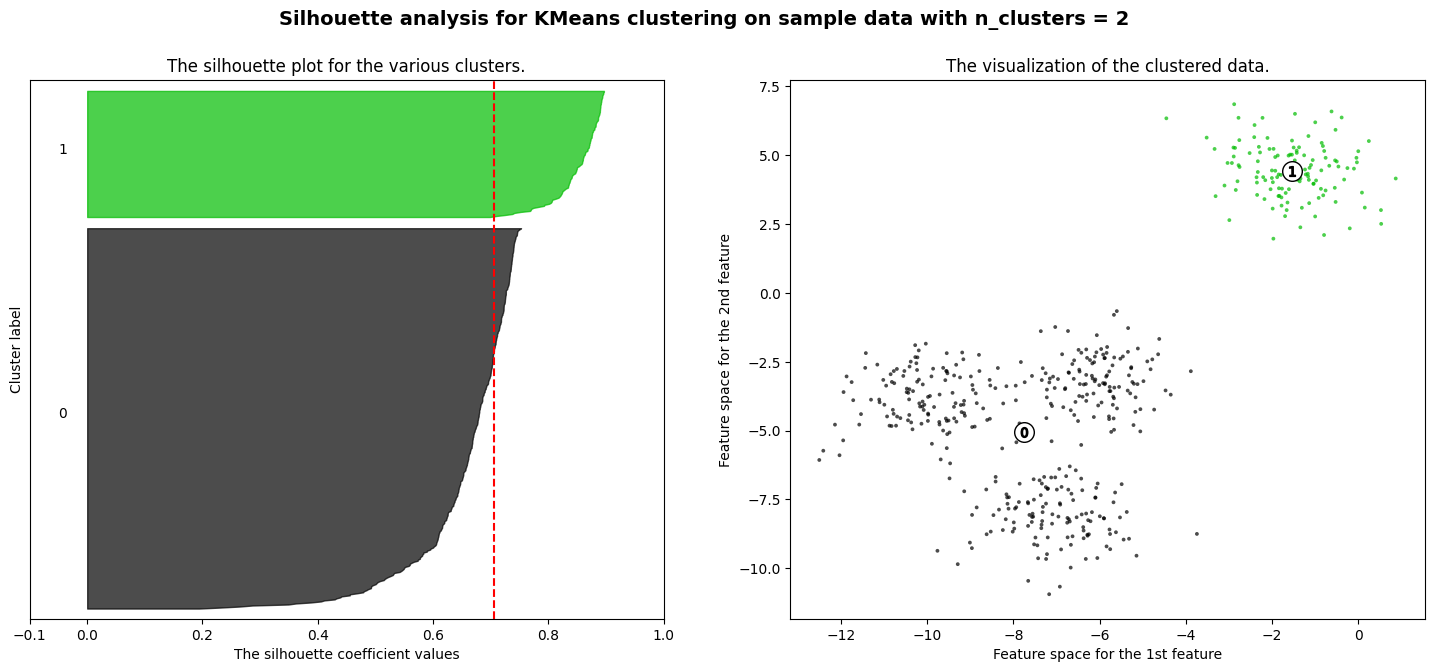

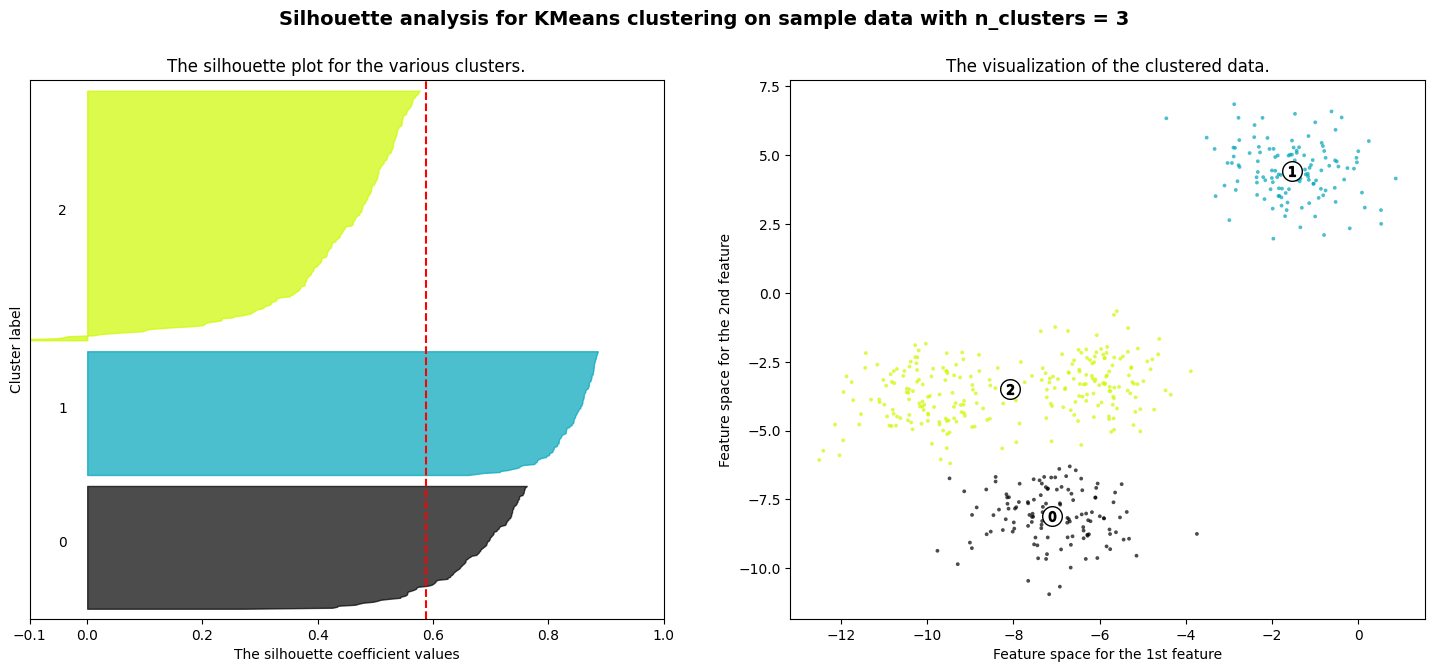

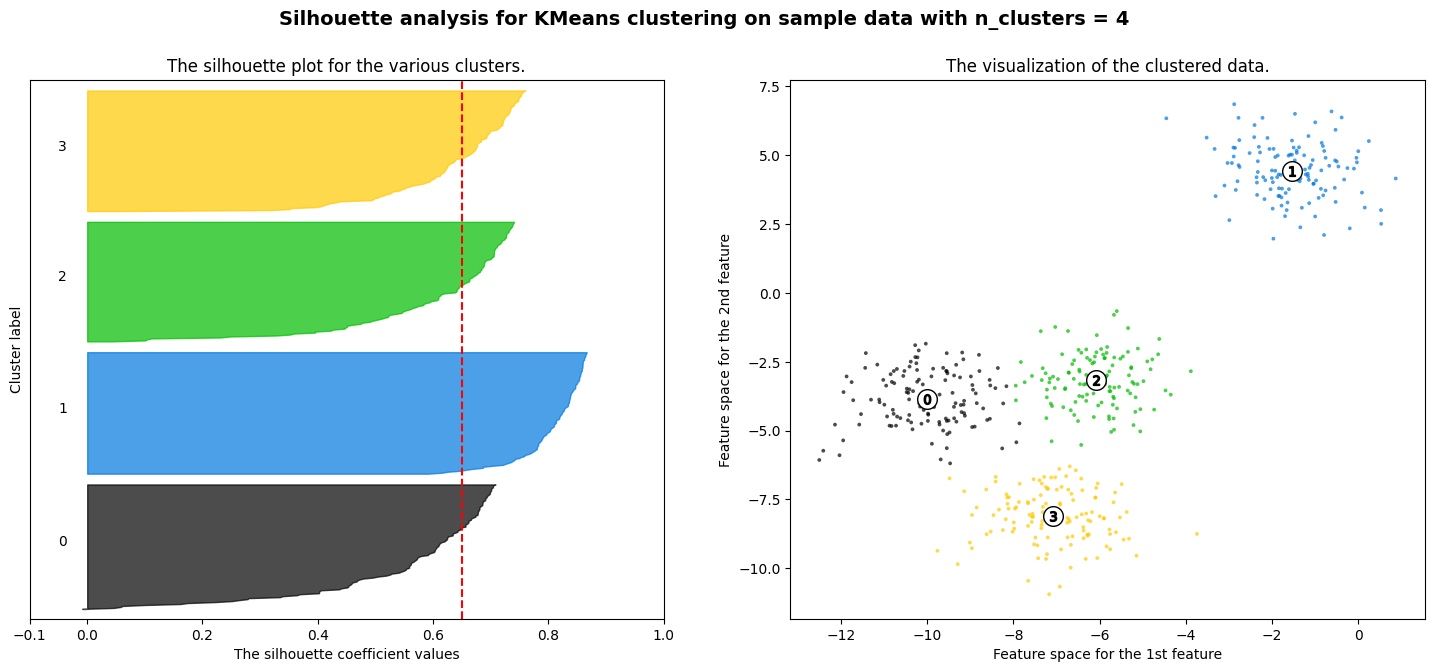

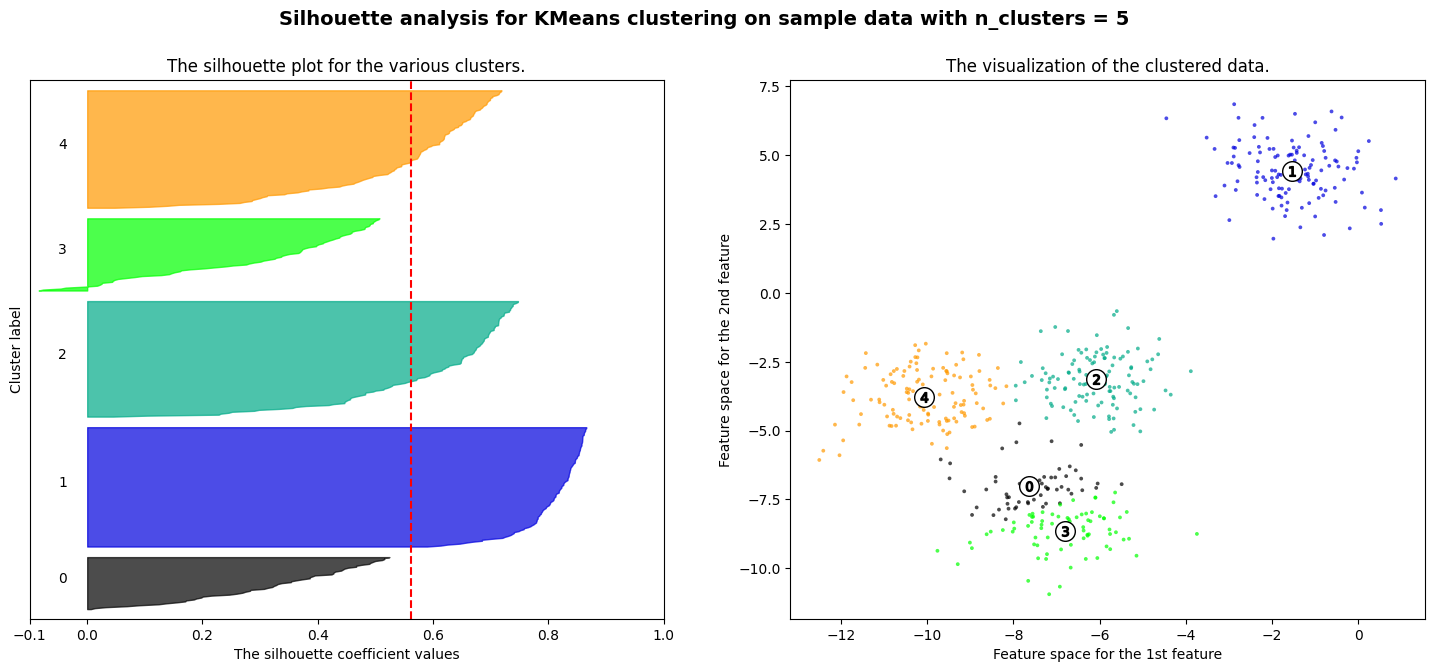

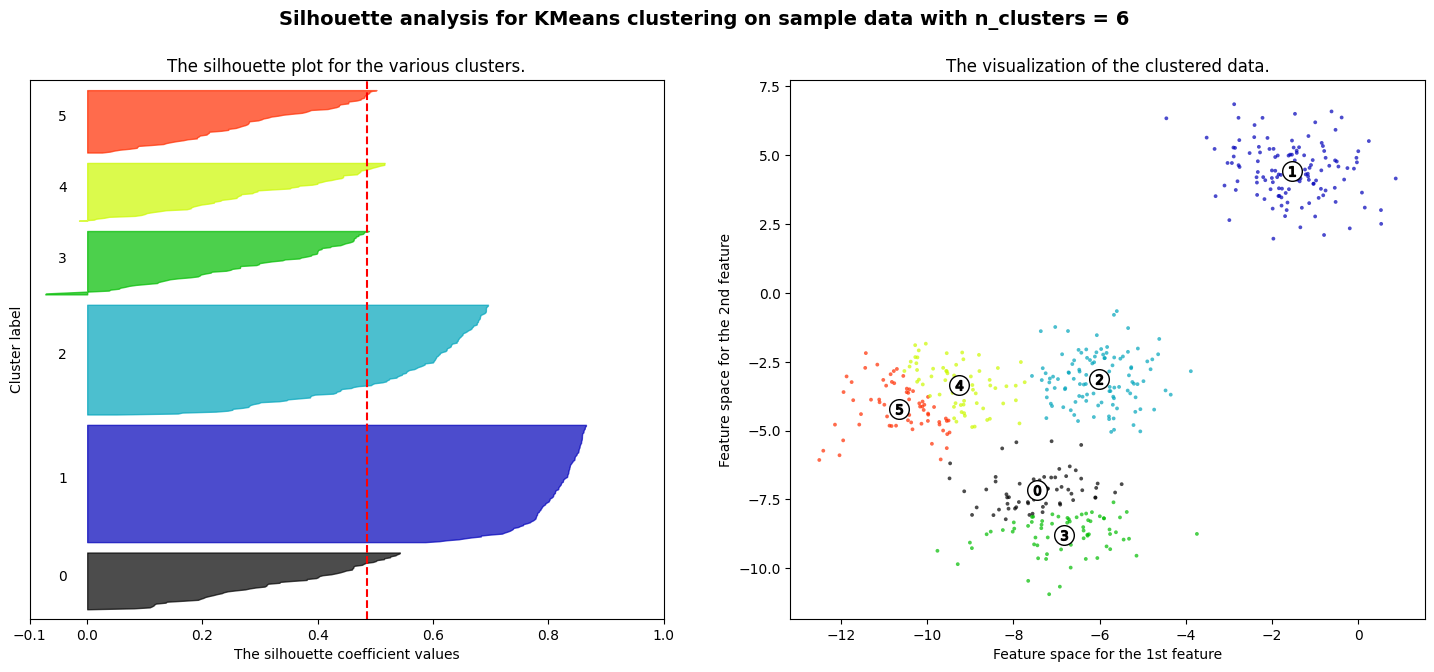

In [ ]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Otros metodos de clustering son basados en densidasd (DBSCAN) o en jerarquia (arbold) HDBSCAN. No los vemos en esta clase.

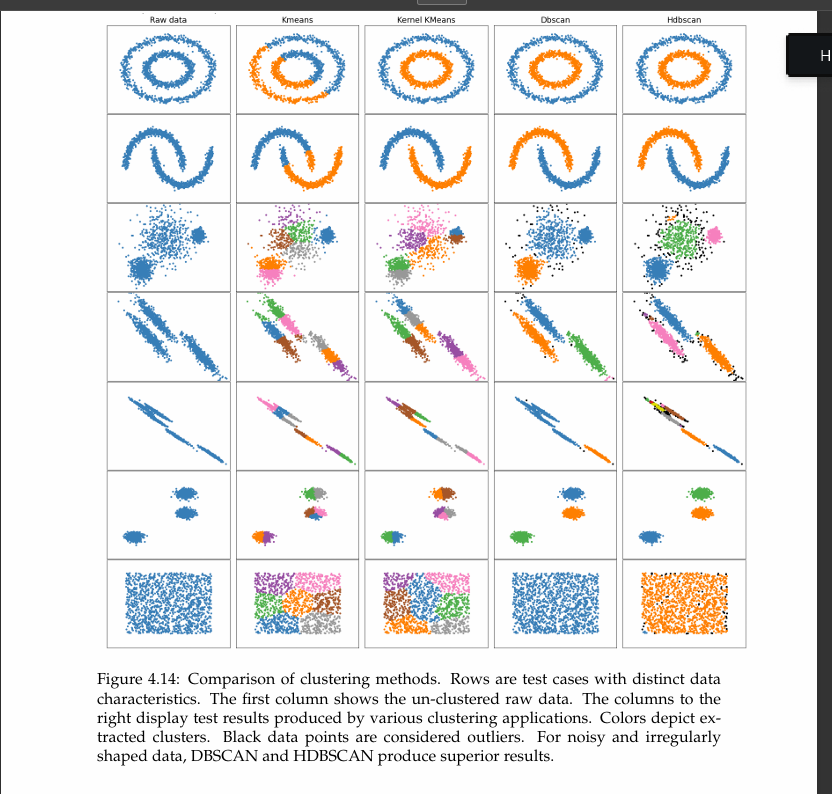

# Reduccion de Dimensionalidad.
Hay muchas razones para querer reducir la dimensionalidad de los datos.

1. Existe algo en la ciencia de la computacion llamado
[The curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality).  La maldicion de la dimensionalidad.
Cuando la dimension es muy grande, los datos estadisticamente pierden informacion. Se retiran mucho.

2. Compresion de datos. Al comprimir los datos (sin perder mucha informacion) pesan menos. Los archivos son mas pequenhos. Gmail, comprime archivos grandes, los manda comprimidos y el servidor de recibo los vuelve a descomprimir.
La comparesion es util tambien para acelar procesos, ademas de util para almacenamiento.

3. Nosotros leemos bien en dos dimensiones (una hoja de papel, un tablero) o hasta en 3. Muchas veces queremos proyetar los datos a 2 o 3 dimensiones para mejor visualizacion.

## Proyeccion de datos a subespacios.
El analisis siguiente se basa en la Figura 4.20 a continuacion.

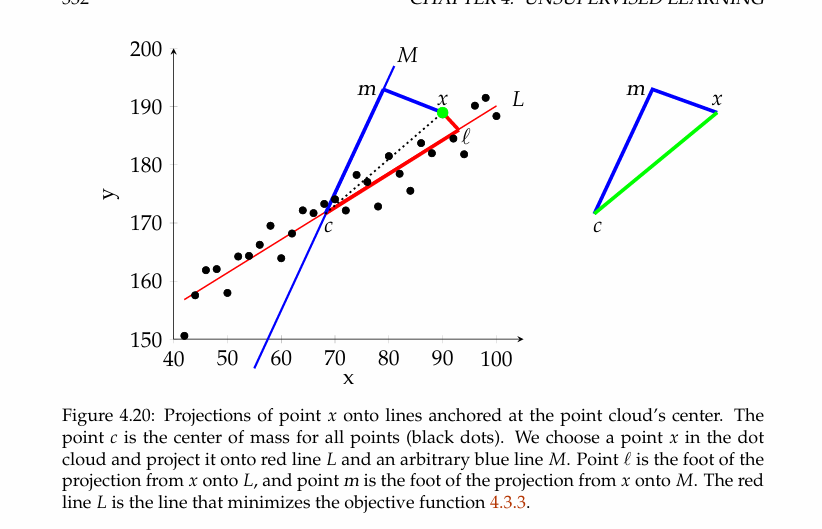

Respecto a la Figura 4.20
* La proyeccion de punto $x$ (arbitrario) a la linea $M$ arbitraria pero con centro geometrico de los puntos $c$ es tal que la distancia $d(x,m)$ es minima (la lina azul) de $x$ a $m$. La longidud de la proyeccion es $d(m,c)$.
Por el teorema de Pitagoras en el triangulo de la derecha

Pensemos en la distancia Euclidiana
$$d(x,c)^2 = d(x,m)^2 + d(m,c)^2 \tag{1} $$
En general nosotros normalizamos los datos y lo vamos a hacer aca. Si restamos a todos los datos $\mu= c=(\frac1m \sum_{i=1}^m x_i)$ entonces el nuevo centro geometrico es el origen 0.  La Ecuacion (1) se reduce a

$$  \| x \|^2 = \| x - m \|^2 + \| m \|^2  \tag{2} $$

Es claro que queremos minimizar el error entre los puntos $x_i$ y sus proyecciones $m_i$.

Es decir, pensamos en la funcion de costo

$$J_0(\theta) = \sum_{i=1}^m \| x_i - m_i \|^2 $$
En este caso el problema seri la minimizacion de esta funcion de costo sobre todos los posibles $\theta = [0, 2 \pi)$.

Ahora bien. Observe la Ecuacion (2). El t'ermino de la izquierda $\| x \|$ no cambia. Como ese punto no cambia, los dos terminos de la derecha se contraponen. Suman lo mismo. Lo que crece uno, decrece el otro. Entonces minimizar $\| x - m \|^2$ es equivalente a **maximizar** $\| x \|^2$.
Esto nos sugiere una nueva funcion de costo

$$J(\theta) = \sum_{i=1}^m \| m_i \|^2 \tag{3} $$
ahora la tarea es **maximizar** esta funcion.
Una aplicaci'on den Matlab crea esta figura.
[animacion para explicar PCA](https://drive.google.com/file/d/1Uv5_PXDJ-KRV7qZMqZzdOs1jzblcTipq/view).  
Esta figura muestra como al rotar la linea  entre $0$, $2 \pi$ se generan muchas posibilidades y la linea violeta es la que mejor se ajusta a los datos.


Como vamos a minimizar la ecacion (3).
Cada proyeccion $m_i$ esta dada por $(x_i \cdot u) u$ donde
$u=(\cos \theta, \sin \theta)$. Queremos minimizar la suma de las normas
$\| m_i \|^2 = (x_i \cdot u)^2$ para minimizar (3) escribirmos

$$X = \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_m \end{pmatrix}  $$

La funcion de costo (3)
$$ J(\theta) = \| X u \|^2 = u^T X^T X u \tag{4} $$
(tarea, prueben esto)

Recordamos que el maximo de $J(\theta)$ es $\lambda_1$ donde $\lambda_1$ es el autovalor mayor de $X^T X$. Esto por que $J(\theta)$ es el **cociente de Rayleigh** de la matriz de **covarianza** $X^T X$.

Es decir

$$\max_{\theta} J(\theta) = \lambda_1 $$
a este $\lambda_1$ le corresponde una direccion $u_1$

Si tomamos el espacio ortogonal a este podemos buscar el maximo en ese espacio
$$R(A,u) = \max_{\| u \|=1, u \perp u_1} = \lambda_2 $$

Observe la Figura 4.21.


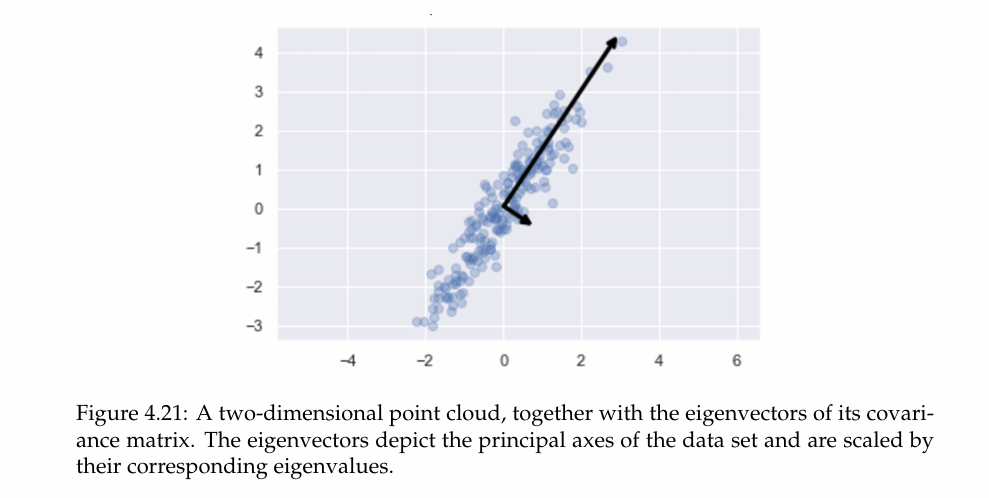

Lo anterior era una introduccion al metodo de PCA. A continuacion mostramos el algoritmo de PCA
Usando el teorema de SVD: $X = U \Lambda V^T$ donde $U \in \mathbb{R}^{m \times m}$, $\Lambda \in \mathbb{R}^{m \times n}$, $V \in \mathbb{R}^{n \times n}$
los valores de $\Lambda$ son los valores singuares de la matriz de datos $x$. Ahora, la matriz de covarianza $\Sigma = X^T X$

$$\Sigma = X^T X = (V \Lambda^T U^T) ( U \Lambda V^T) = V \Lambda^2 V^T $$
En este caso $\Lambda^2$ es la matriz de autovalores de $X^T X$.

La pregunta es como se reducen las dimensiones. Inicialmente debemos definir un umbral de forma que las dimensiones incluidas esten por encima de este umbral y las rechazadas por debajo. Esto lo vemos al final de la clase.
De ese umbral sale que por ejemplo vamos a **proyectar** los datos de un espacio de $n$ dimensiones a una $k$ dimensiones. (cortar). Definimos la matriz truncada

$$W = [ V_1 | V_2 | \cdots | V_k ] $$
la idea es $k < n$. Si $k=n$ no hacemos nada. La proyeccion de los puntos $x_j$ en las direeccones $v_i$ es

$$z_{ji} = \langle x_j, v_i \rangle \quad , \quad j=1, \cdots, m \quad , \quad i=1, \cdots , k  $$

De forma matricial

$$Z = X W $$
Esta es la proyeccion de mis datos a un espacio de menor dimension. Es decir
$$X \in \mathbb{R}^{m \times n} $$
Ahora los datos estan proyectados a una menor dimension como
$$Z \in \mathbb{R}^{m \times k} $$, $k < n$.

Que tan buena puede ser esta aproximacion?

## Recobro de los datos $X_{rec}$ a partir de la aproximacion (compresion) $Z$.

La ecuacion es simple.

$$X_{rec} = Z W^T $$
Esta ecuacion es

$$X_{rec} = X W W^T $$
obviamente si $k=n$, $W W^T=I$, pues $W=V$. Entonces $X_{rec}=X$. Recobro perfecto. Pero esa no es la idea. Toca perder para $k<n$ (para bajar dimensiones). Esto lo vemos en unos minutos.  Como encontrar $k$?




### Algoritmo:
* Parte I:
    * Con los datos construya la matriz
$X$.
    * Haga SVD en $X$.
    * Estudie los autovalores $\lambda_i^2$ de $\Sigma=X^T X$ (matriz de covarianza). Decida un umbral ($k  < n$).
    * Trunque la matriz $V$ escogiendo las primeras $k$ columnas:
$$W = [ V_1 | V_2 | \cdots | V_k ] $$
    * Construya la proyecion $Z=XW$
* Parte II: (reconstruccion)
$$X_{rec} = Z W^T $$

Hay otros metodos para reducir dimensionalidad pero no los vemos en este curso Estan en el texto guia.

## Como escogemos $k$?
Para esto debemos estimar el error que se comete al escoger $k$.

* **Average squared projecton error**: Error de proyeccion cuadrado promedio.
$$\epsilon = \frac1m \sum_{i=1}^m \| x^{(i)} - x_{aprox}^{(i)} \|^2 $$

* **Porcentaje del promedio de error cuadrado con respecto  a la variacion total**:
La variacion total se define por

$$\text{Tot}_{var} = \frac1m \sum_{i=1}^m \| x^{(i)} \|^2 $$
Si $\mu = \frac1m \sum_{i=1}^m x^{(i)} = 0$ esto es la varianza de los datos.
El relativo (porcentaje es)

$$
\frac{\epsilon}{\text{Tot}_{var}} =
\frac{ \frac1m \sum_{i=1}^m \| x^{(i)} - x_{aprox}^{(i)} \|^2}{
 \frac1m \sum_{i=1}^m \| x^{(i)} \|^2     
}
$$
El $\frac1m$ se cancela.

* energia relativo acumulado como suma de valores singulares.

$$\frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^n \sigma_i^2} $$

Hay un hecho que lo dejo como prueba en la tarea. Es que la energia total corresponde a la suma de los cuadrados de los autovalores.

$$
\sum_{i=1}^m \| x^{(i)} \|^2 = \sum_{i=1}^n \sigma_i^2. \tag{5}
$$

El error acumulado entre los datos exctos y aproximados est'a en las ultimas $k+1, k+2, \cdots , n$ de los valores singulares. Es decir en el SVD





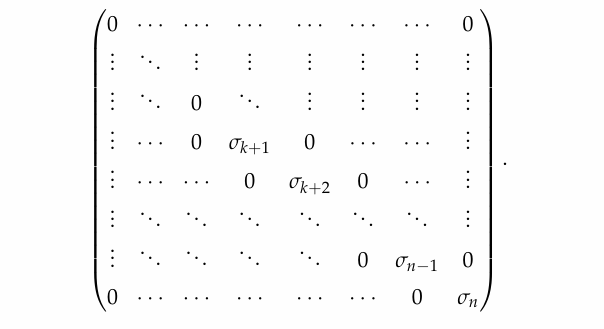

La norma Frobenious al cuadrado de la matriz error esta dada por la suma de los valores singulares al cuadrado.

$$ \sum_{i=1}^m \| x^{(i)} - x_{aprox}^{(i)} \|^2 = \sum_{i=k+1}^n \sigma_i^2 $$
Entonces

$$ \sum_{i=1}^m \| x^{(i)} - x_{aprox}^{(i)} \|^2 =
\sum_{i=1}^n \sigma_i^2 - \sum_{i=1}^k \sigma_i^2
$$

De form que

$$
\frac{ \frac1m \| x^{(i)} - x_{aprox}^{(i)} \|^2 }{\frac1m  \sum_{i=1}^m \| x^{(i)}\|^2} =
\frac{\sum_{i=1}^n \sigma_i^2 - \sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^n}
= 1 - \frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^n \sigma_i^2}
$$

Si lo que quiero es perder el 1 por cient de la energia$$
\frac{ \frac1m \| x^{(i)} - x_{aprox}^{(i)} \|^2 }{\frac1m  \sum_{i=1}^m \| x^{(i)}\|^2} =
\frac{\sum_{i=1}^n \sigma_i^2 - \sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^n}
= 1 - \frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^n \sigma_i^2}
\le 0.01 $$

O de otra forma
$$
 \frac{\sum_{i=1}^k \sigma_i^2}{\sum_{i=1}^n \sigma_i^2} \ge 0.99.
$$

Este el criterio para escoger $k$.  Se podria pensar en una grafica como funcion $k$ y cortarla en el 99 \%.

